In [58]:
import copy
#packages we'll need

%matplotlib inline 
#this is a ``magic command'' specific to display plots in-line in a jupyter notebook
#normally you would plot by calling a plt.show()


from matplotlib.colors import LogNorm
#need this for the colourbar of the 2D histogram


%run DataAnalysis.ipynb

In [59]:
data = DataAnalysis()
data.load_eventdf('data/new_moo/real/events.csv')
data.load_clusterdf('data/new_moo/real/clusters.csv')

data.filter_fit(3.5,5)

In [60]:
data.get_clusterdf()[data.get_clusterdf()['dEdx_err'] > .7]

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh,dEdx,dEdx_err,Fitline
0,0,7,7,5116.891,0.490,0.947620,0.432990,-0.917113,1,0,619.330620,0.720129,"[-37.713415, -176.446341, 290.016695, -0.40270..."
32,32,9,9,163019.033,0.769,1.387908,0.691990,1.149584,2,4,491.033191,0.784601,"[-267.995967, 33.066125, -76.68464, -0.13382, ..."
39,39,7,7,186192.981,0.193,1.089827,0.682230,-1.127103,0,0,676.003044,0.746714,"[121.389387, 171.873992, -94.902617, -0.554964..."
117,117,9,9,457473.094,0.314,1.010601,0.805950,0.616909,1,0,619.609743,0.840845,"[-325.293963, -131.953638, -122.131446, 0.2279..."
134,134,10,10,541431.905,0.526,0.909115,0.623332,-0.611961,1,0,613.954689,0.741386,"[-257.605297, -128.139544, -2.061033, 0.583621..."
144,144,10,10,586678.547,0.633,0.885468,0.711444,1.125942,0,0,604.062578,0.880810,"[-111.737188, 109.942124, -237.683586, 0.12180..."
148,148,8,8,616078.002,0.373,0.952329,0.931470,0.714000,2,0,580.441882,0.784282,"[-188.241795, -274.158583, -191.609811, 0.1784..."
155,155,9,9,669526.829,0.485,1.445206,0.970373,-0.058394,1,1,669.171204,0.702058,"[-276.360562, 51.464717, 58.704091, 0.692812, ..."
207,207,5,5,930170.794,0.513,1.216116,0.843444,-1.548835,0,0,497.639836,0.802317,"[-313.008463, 195.417753, -250.914454, 0.45468..."
318,318,6,6,1426202.487,0.962,2.142153,0.738279,0.847247,3,2,376.340381,0.786558,"[-52.198933, 348.845236, -357.97212, -0.061188..."


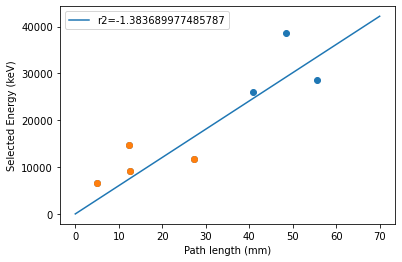

(602.9134171153659, -1.383689977485787)

In [62]:
c = 456
plt.scatter(data.get_cluster(c)['PathLength'], data.get_cluster(c)['SelectedEnergy'])

fitline = data.get_clusterdf()[data.get_clusterdf()['Cluster'] == c]['Fitline'].values[0]
data.dEdx(data.get_cluster(c), fitline, show_graph=True)

In [55]:
data.get_cluster(c)

,Run,Channel,Time,NumPulses,OFdelay,MaxPosInWindow,SelectedEnergy,Baseline,MaxToBaseline,StabAmp,IsSaturated,MaxTime,Cluster,Hit,PathLength
3444,350266,954,541428.800,1,3.143510,3.105,33857.355835,-4388.203435,13256.470495,48274.334388,True,541431.905,134,True,46.546279
3445,350266,942,541428.824,1,3.149596,3.141,6799.703457,-5007.788528,2931.212296,9210.456312,False,541431.965,134,True,16.201915
3446,350266,882,541428.824,1,3.159925,3.147,18312.382180,-4993.389196,11611.644811,22220.136434,False,541431.971,134,True,25.756852
3447,350266,793,541428.840,1,3.223641,3.184,14271.688686,-3640.374018,12867.848231,25686.207849,True,541432.024,134,True,12.488515
3448,350266,943,541428.800,1,3.142185,3.274,35378.802162,-4966.572347,14582.253042,48238.631554,True,541432.074,134,True,59.617177
3449,350266,806,541428.808,1,3.154267,3.378,27728.987028,-5238.442708,14800.130178,32698.898714,True,541432.186,134,True,32.986212
3450,350266,867,541428.808,2,3.156480,3.448,33674.131690,-7041.999146,16643.821045,41117.465885,True,541432.256,134,True,61.581076
3451,350266,881,541428.816,1,3.156281,3.450,24779.174989,-4074.530604,13672.186854,29513.907182,True,541432.266,134,True,50.062239
3452,350266,955,541428.808,1,3.406194,3.614,19846.903972,-3654.812907,13261.761759,33142.671996,True,541432.422,134,True,29.272813
3453,350266,805,541428.808,1,3.174231,3.623,25890.974241,-4997.056178,14551.053218,29811.772838,True,541432.431,134,True,42.832879


Text(0, 0.5, 'Num')

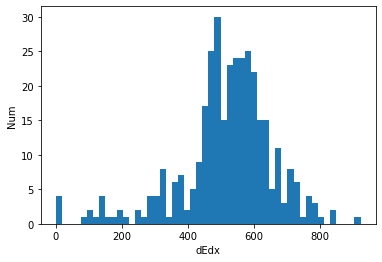

In [5]:
array = plt.hist(data.get_clusterdf()['dEdx'], bins=50)
plt.xlabel("dEdx")
plt.ylabel("Num")

Text(0, 0.5, 'Num')

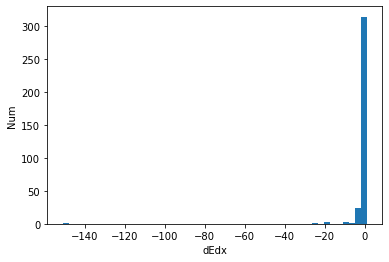

In [6]:
array = plt.hist(data.get_clusterdf()['dEdx_err'], bins=50)
plt.xlabel("dEdx")
plt.ylabel("Num")

In [7]:
bad = [1,2,3]
for i, row in data.get_cluster(0).iterrows():
    if row['IsSaturated'] and row['Channel'] not in bad:
        print('yep')

yep
yep
yep
yep


In [8]:
noisydata = copy.deepcopy(data)

In [9]:
#data.filter_noisy()

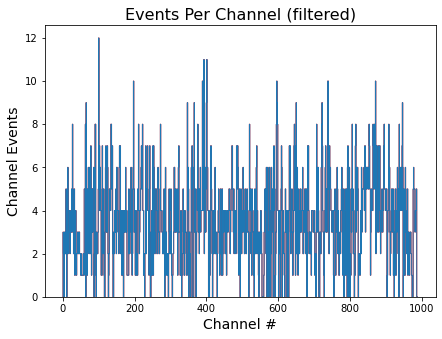

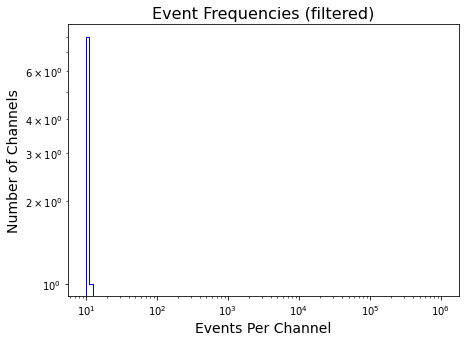

In [10]:
plt.figure(figsize=(7,5)) # lets you make a custom size for your plot
array1=plt.hist(noisydata.get_eventdf()['Channel'].values, np.linspace(0,989,990) , histtype='step', color='r')#np.linspace function is hlepful for generating bins
array2=plt.hist(data.get_eventdf()['Channel'].values, np.linspace(0,989,990), histtype='step')#np.linspace function is hlepful for generating bins
plt.title("Events Per Channel (filtered)", fontsize=16)
plt.xlabel('Channel #',fontsize=14)
plt.ylabel('Channel Events',fontsize=14)
#plt.gca().set_yscale("log")
#plt.ylim(1,200)


#plt.savefig('plots/pdf/EventsPerChannel.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/EventsPerChannel.png',dpi=300,bbox_inches = "tight")


plt.figure(figsize=(7,5))
plt.hist(array1[0], np.logspace(1,6,100), histtype='step', color='r')
plt.hist(array2[0], np.logspace(1,6,100),color='b', histtype='step')
plt.title("Event Frequencies (filtered)",fontsize=16)
plt.xlabel('Events Per Channel',fontsize=14)
plt.ylabel('Number of Channels',fontsize=14)
plt.gca().set_yscale("log")
plt.gca().set_xscale("log")


#plt.savefig('plots/pdf/EventFrequency.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/EventFrequency.png',dpi=300,bbox_inches = "tight")

In [11]:
quietdata = copy.deepcopy(data)

In [12]:
#data.filter_baseline()

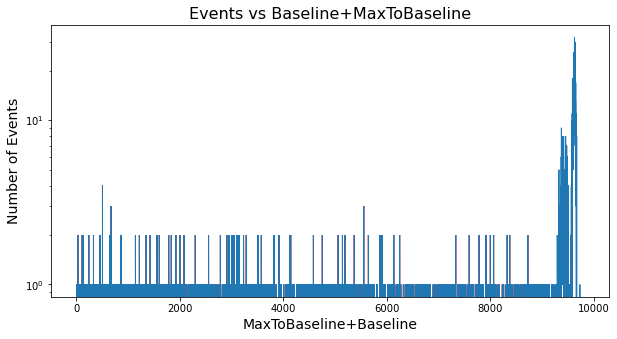

In [13]:
plt.figure(figsize=(10,5)) # lets you make a custom size for your plot
#plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Events vs Baseline+MaxToBaseline", fontsize=16)

plt.ylabel('Number of Events',fontsize=14)
plt.xlabel('MaxToBaseline+Baseline',fontsize=14)
plt.hist(quietdata.get_eventdf()['MaxToBaseline'].values+quietdata.get_eventdf()['Baseline'].values, np.linspace(0,9000,9001), histtype='step', color='r')
array=plt.hist(data.get_eventdf()['MaxToBaseline'].values+data.get_eventdf()['Baseline'].values, np.linspace(0,9800,9801), histtype='step')
plt.gca().set_yscale("log")

plt.savefig('plots/pdf/Baseline_MaxToBaseline.pdf',bbox_inches = "tight")
plt.savefig('plots/png/Baseline_MaxToBaseline.png',dpi=300,bbox_inches = "tight")

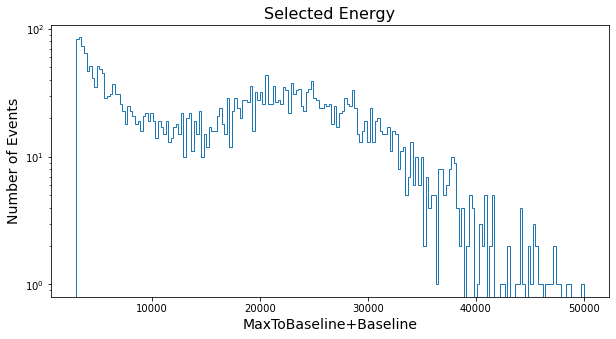

In [14]:
plt.figure(figsize=(10,5)) # lets you make a custom size for your plot
#plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Selected Energy", fontsize=16)

plt.ylabel('Number of Events',fontsize=14)
plt.xlabel('MaxToBaseline+Baseline',fontsize=14)
#plt.hist(quietdata.get_eventdf()['MaxToBaseline'].values+quietdata.get_eventdf()['Baseline'].values, np.linspace(0,9000,9001), histtype='step', color='r')
array=plt.hist(data.get_eventdf()['SelectedEnergy'].values, np.linspace(3000,50000,200), histtype='step')
#array=plt.hist(data.get_cluster(0)['SelectedEnergy'].values, np.linspace(3000,50000,200), histtype='step')


plt.gca().set_yscale("log")


In [15]:
#data = DataAnalysis(load=True, eventfile='data/big_boi/bigeventdf.csv', clusterfile='data/big_boi/bigclusterdf.csv')

In [16]:
#event_threshold = 5
#time_threshold = 1

#data.arrange_clusters(event_threshold, time_threshold)
#data.make_clusterDF()

In [17]:
messydata = copy.deepcopy(data)

In [18]:
messydata.get_clusterdf()

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh,dEdx,dEdx_err,Fitline
0,0,7,7,5116.891,0.490,0.947620,0.432990,-0.917113,1,0,619.330620,0.720129,"[-37.713415, -176.446341, 290.016695, -0.40270..."
1,1,6,6,7194.337,0.502,0.710543,0.394508,-0.840849,0,0,489.022302,-0.315321,"[113.847167, 49.296416, 228.692113, -0.376043,..."
3,3,6,5,26158.403,0.232,1.860629,0.384318,-1.269715,0,1,440.493905,-0.070374,"[322.752244, -119.770933, 173.873132, -0.30135..."
4,4,6,6,27250.906,1.288,1.329003,0.927768,-1.033640,0,1,708.206112,-2.280412,"[141.050955, 274.369213, -353.377226, 0.736756..."
5,5,6,6,29660.033,0.226,1.222568,0.613271,0.582664,0,0,495.301724,-0.647283,"[187.785345, -251.771127, 58.174098, 0.200391,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,500,11,8,2710760.519,0.903,2.307929,0.609043,-0.669864,7,4,285.449152,-0.200170,"[336.522546, 151.104613, -346.092299, -0.57168..."
502,502,11,11,2728511.764,0.730,0.958167,0.549398,-1.392850,1,0,605.568774,-0.043469,"[-36.441909, -267.867669, 290.158523, -0.37836..."
504,504,8,8,2747006.328,0.537,0.974741,1.147508,1.164193,0,0,548.554618,0.313039,"[-43.940077, 319.543147, -165.13936, 0.204219,..."
505,505,5,5,2747961.339,0.108,1.476851,1.107522,0.025601,0,1,722.841752,0.915655,"[-333.11892, -201.245426, -306.450939, 0.70775..."


In [19]:
print("Messy cluster rate: " + str(messydata.get_clusterrate()))
data.filter_fit(3.5, 5) #(NRMSE, channels)
print("Filtered cluster rate: " + str(data.get_clusterrate()))

clusters: 346
run time: 2636943.0
Messy cluster rate: 0.0001312125442226093
clusters: 346
run time: 2636943.0
Filtered cluster rate: 0.0001312125442226093


In [20]:
data.get_clusterdf()

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh,dEdx,dEdx_err,Fitline
0,0,7,7,5116.891,0.490,0.947620,0.432990,-0.917113,1,0,619.330620,0.720129,"[-37.713415, -176.446341, 290.016695, -0.40270..."
1,1,6,6,7194.337,0.502,0.710543,0.394508,-0.840849,0,0,489.022302,-0.315321,"[113.847167, 49.296416, 228.692113, -0.376043,..."
3,3,6,5,26158.403,0.232,1.860629,0.384318,-1.269715,0,1,440.493905,-0.070374,"[322.752244, -119.770933, 173.873132, -0.30135..."
4,4,6,6,27250.906,1.288,1.329003,0.927768,-1.033640,0,1,708.206112,-2.280412,"[141.050955, 274.369213, -353.377226, 0.736756..."
5,5,6,6,29660.033,0.226,1.222568,0.613271,0.582664,0,0,495.301724,-0.647283,"[187.785345, -251.771127, 58.174098, 0.200391,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,500,11,8,2710760.519,0.903,2.307929,0.609043,-0.669864,7,4,285.449152,-0.200170,"[336.522546, 151.104613, -346.092299, -0.57168..."
502,502,11,11,2728511.764,0.730,0.958167,0.549398,-1.392850,1,0,605.568774,-0.043469,"[-36.441909, -267.867669, 290.158523, -0.37836..."
504,504,8,8,2747006.328,0.537,0.974741,1.147508,1.164193,0,0,548.554618,0.313039,"[-43.940077, 319.543147, -165.13936, 0.204219,..."
505,505,5,5,2747961.339,0.108,1.476851,1.107522,0.025601,0,1,722.841752,0.915655,"[-333.11892, -201.245426, -306.450939, 0.70775..."


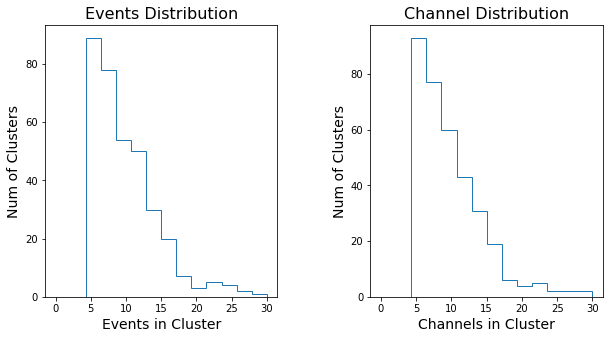

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
#fig.suptitle('Horizontally stacked subplots')
plt.subplots_adjust(wspace=.4)

ax1.set_title("Events Distribution", fontsize=16)
ax1.set_xlabel("Events in Cluster", fontsize=14)
ax1.set_ylabel("Num of Clusters", fontsize=14)
#ax1.hist(messydata.get_clusterdf()["Events"], np.linspace(0,30,31), histtype='step', color='r')
ax1.hist(data.get_clusterdf()["Events"], np.linspace(0,30,15), histtype='step')



ax2.set_title("Channel Distribution", fontsize=16)
ax2.set_xlabel("Channels in Cluster", fontsize=14)
ax2.set_ylabel("Num of Clusters", fontsize=14)
#ax2.hist(messydata.get_clusterdf()["Channels"], np.linspace(0,30,31), histtype='step', color='r')
array = ax2.hist(data.get_clusterdf()["Channels"], np.linspace(0,30,15), histtype='step')


plt.savefig('plots/pdf/Event+Channel_Dist.pdf',bbox_inches = "tight")
plt.savefig('plots/png/Event+Channel_Dist.png',dpi=300,bbox_inches = "tight")

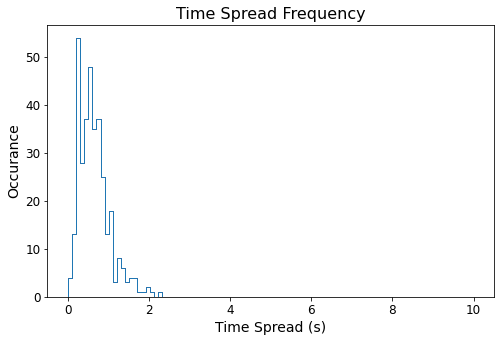

In [22]:
plt.figure(figsize=(8,5))
array = plt.hist(messydata.get_clusterdf()["TimeSpread"],np.linspace(0,10,100), histtype='step', color='r')
array = plt.hist(data.get_clusterdf()["TimeSpread"],np.linspace(0,10,100), histtype='step')
plt.title("Time Spread Frequency", fontsize=16)
plt.xlabel("Time Spread (s)", fontsize=14)
plt.ylabel("Occurance", fontsize=14)
plt.tick_params(labelsize=12) #adjust fontsize of axis ticks

#plt.ylim(0,50)

#plt.savefig('plots/pdf/Pre_TimeSpread.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Pre_TimeSpread.png',dpi=300,bbox_inches = "tight")


#plt.figure()
#plt.title("Time Spread Frequency (filtered)", fontsize=16)
#plt.xlabel("Time Spread (s)", fontsize=14)
#plt.ylabel("Occurance", fontsize=14)

#plt.ylim(0,50)

plt.savefig('plots/pdf/TimeSpread.pdf',bbox_inches = "tight")
plt.savefig('plots/png/TimeSpread.png',dpi=300,bbox_inches = "tight")

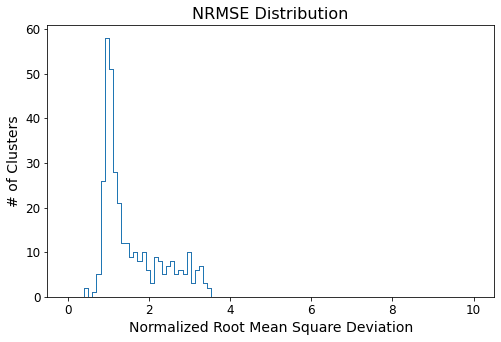

In [23]:
plt.figure(figsize=(8,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=12) #adjust fontsize of axis ticks
plt.title("NRMSE Distribution", fontsize=16)
plt.ylabel('# of Clusters',fontsize=14)
plt.xlabel('Normalized Root Mean Square Deviation',fontsize=14)

array=plt.hist(messydata.get_clusterdf()['NRMSE'], np.linspace(0,10,100), histtype='step', color='r')
array=plt.hist(data.get_clusterdf()['NRMSE'], np.linspace(0,10,100), histtype='step')

#line = plt.axvline(1)

plt.savefig('plots/pdf/NRMSE.pdf',bbox_inches = "tight")
plt.savefig('plots/png/NRMSE.png',dpi=300,bbox_inches = "tight")


#############################################################################################################
#
#plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
#plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
#plt.title("Filtered NRMSE Distribution", fontsize=18)
#plt.ylabel('# of Clusters',fontsize=16)
#plt.xlabel('Normalized Root Mean Square Deviation',fontsize=16)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

#array=plt.hist(clusterdata['Zenith(deg)'], np.linspace(0,180,181), histtype='step')


#line=plt.axvline(1)
#plt.gca().set_yscale("log")

#plt.savefig('plots/pdf/NRMSE.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/NRMSE.png',dpi=300,bbox_inches = "tight")

In [24]:
len(data.get_clusterdf())/len(messydata.get_clusterdf())

1.0

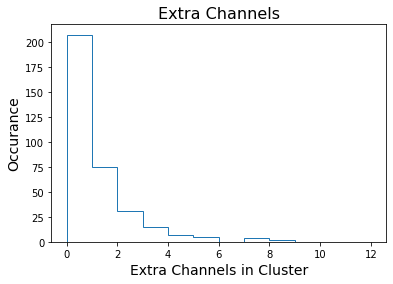

In [25]:
plt.figure()
plt.title("Extra Channels", fontsize=16)
plt.xlabel("Extra Channels in Cluster", fontsize=14)
plt.ylabel("Occurance", fontsize=14)

#array = plt.hist(messydata.get_clusterdf()['ExtraCh'], np.linspace(0,12,13), color='r', histtype='step')
#plt.gca().set_yscale("log")

#plt.savefig('plots/pdf/Pre_ExtraChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Pre_ExtraChannels.png',dpi=300,bbox_inches = "tight")


#plt.figure()
#plt.title("Extra Channels (filtered)", fontsize=16)
#plt.xlabel("Extra Channels in Cluster", fontsize=14)
#plt.ylabel("Occurance", fontsize=14)

array = plt.hist(data.get_clusterdf()['ExtraCh'], np.linspace(0,12,13), histtype='step')
#plt.gca().set_yscale("log")

#plt.savefig('plots/pdf/ExtraChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/ExtraChannels.png',dpi=300,bbox_inches = "tight")

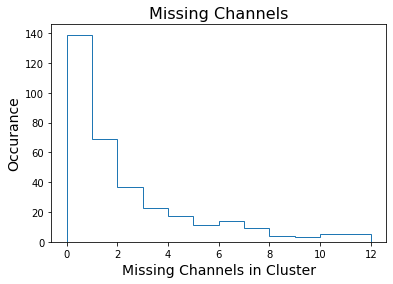

In [26]:
plt.figure()
plt.title("Missing Channels", fontsize=16)
plt.xlabel("Missing Channels in Cluster", fontsize=14)
plt.ylabel("Occurance", fontsize=14)
#array = plt.hist(messydata.get_clusterdf()['MissingCh'], np.linspace(0,12,13), color='r', histtype='step')

#plt.savefig('plots/pdf/Pre_MissingChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Pre_MissingChannels.png',dpi=300,bbox_inches = "tight")


#plt.figure()
#plt.title("Missing Channels (filtered)", fontsize=16)
#plt.xlabel("Missing Channels in Cluster", fontsize=14)
#plt.ylabel("Occurance", fontsize=14)
array = plt.hist(data.get_clusterdf()['MissingCh'], np.linspace(0,12,13), histtype='step')

#plt.savefig('plots/pdf/MissingChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/MissingChannels.png',dpi=300,bbox_inches = "tight")


In [27]:
mc = DataAnalysis()
mc.load_eventdf('data/path/MC_events.csv')
mc.load_clusterdf('data/path/MC_clusters.csv')

plt.hist(np.cos(mc.get_clusterdf()['Zenith'].values), np.linspace(0,1,39), histtype='step')
plt.scatter(cos_theta[:,0], cos_theta[:,1] * 100/7.5)

plt.figure()
plt.hist(mc.get_clusterdf()['Azimuth'].values, np.linspace(-np.pi/2,np.pi/2,19), histtype='step')
plt.scatter(phi[:,0], phi[:,1] * 100/7.5)

NameError: name 'DataAnalysis' is not defined

In [ ]:
len(np.linspace(-np.pi/2,np.pi/2,19))

In [ ]:
cos_theta=pd.read_csv('data/angular/cos_theta.csv', sep=',',header=None).values
raw_phi=pd.read_csv('data/angular/phi.csv', sep=',',header=None).values




cos_theta[:,1] *= 1/12
raw_phi[:,1] *= 1/12

print(raw_phi[:,0])

phi[:,0] -= 36.24
raw_phi[:,0] = raw_phi[:,0] - (raw_phi[:,0] > 90)*180
raw_phi = np.array(sorted(zip(raw_phi[:,0], raw_phi[:,1])))

phi = []
for i in range(0,36,2):
    x = (raw_phi[:,0][i] + raw_phi[:,0][i+1])/2
    y = raw_phi[:,1][i] + raw_phi[:,1][i+1]
    
    phi.append((x,y))

phi = np.array(phi)



#phi[:,0] *= np.pi / 180


print(len(cos_theta))
print(len(phi))

In [ ]:
phi

In [ ]:
np.linspace(0,180,36)

In [ ]:
#phi = raw_phi
#for i in range(0,36,2):
#    x = (raw_phi[:,0][i] + raw_phi[:,0][i+1])/2
#    y = raw_phi[:,1][i] + raw_phi[:,1][i+1]
    
#    phi.append((x,y))

#phi = np.array(phi)
#phi[:,0] -= 90

In [ ]:
np.sum(phi[:,1])

In [ ]:
np.sum(cos_theta[:,1])

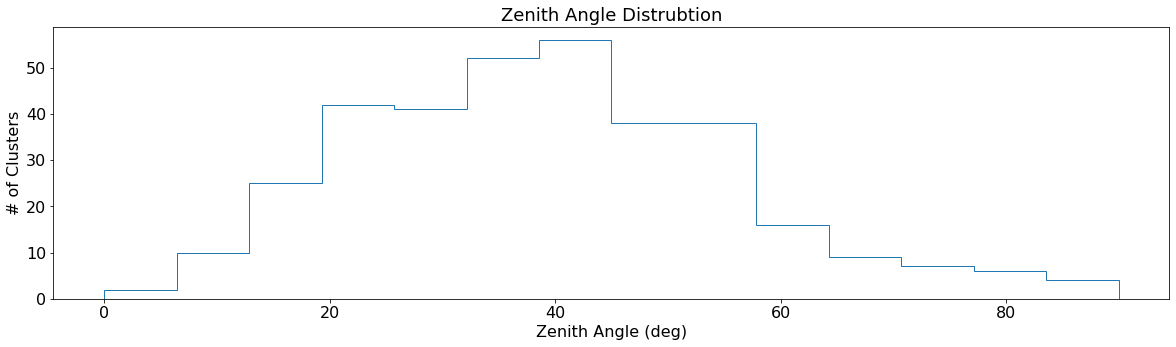

In [28]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Zenith Angle Distrubtion", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Zenith Angle (deg)',fontsize=16)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

#array=plt.hist(clusterdata['Zenith(deg)'], np.linspace(0,100,40), histtype='step')
array=plt.hist([phi*180/np.pi for phi in data.get_clusterdf()['Zenith'].values], np.linspace(0,90,15), histtype='step')

plt.savefig('plots/pdf/Zenith.pdf',bbox_inches = "tight")
plt.savefig('plots/png/Zenith.png',dpi=300,bbox_inches = "tight")

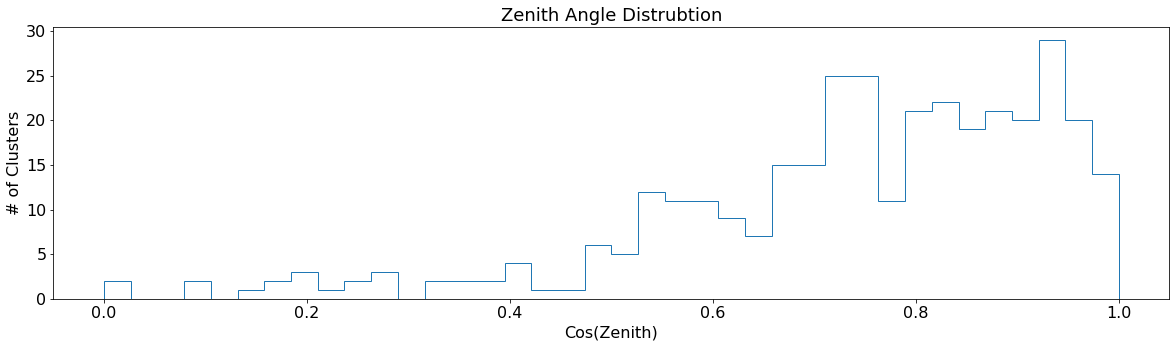

In [29]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Zenith Angle Distrubtion", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Cos(Zenith)',fontsize=16)
array = plt.hist([math.cos(x) for x in data.get_clusterdf()['Zenith']], bins=38, histtype='step')
#plt.scatter(cos_theta[:,0], cos_theta[:,1])

plt.savefig('plots/pdf/CosZenith.pdf',bbox_inches = "tight")
plt.savefig('plots/png/CosZenith.png',dpi=300,bbox_inches = "tight")

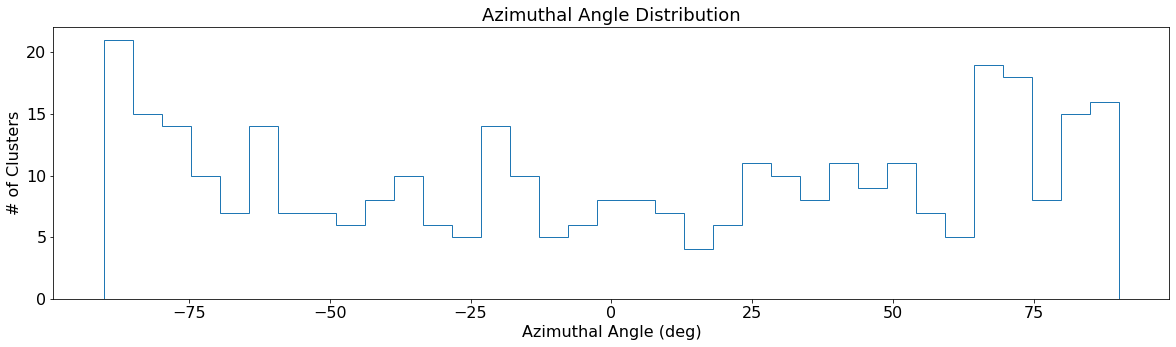

In [30]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Azimuthal Angle Distribution", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Azimuthal Angle (deg)',fontsize=16)

#plt.ylim(0,15)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

#array=plt.hist(clusterdata['Zenith(deg)'], np.linspace(0,100,40), histtype='step')
array=plt.hist([phi*180/np.pi for phi in data.get_clusterdf()['Azimuth']], np.linspace(-90,90,36), histtype='step')
#plt.scatter(phi[:,0], phi[:,1])


plt.savefig('plots/pdf/Azimuth.pdf',bbox_inches = "tight")
plt.savefig('plots/png/Azimuth.png',dpi=300,bbox_inches = "tight")

In [31]:
array

(array([21., 15., 14., 10.,  7., 14.,  7.,  7.,  6.,  8., 10.,  6.,  5.,
        14., 10.,  5.,  6.,  8.,  8.,  7.,  4.,  6., 11., 10.,  8., 11.,
         9., 11.,  7.,  5., 19., 18.,  8., 15., 16.]),
 array([-90.        , -84.85714286, -79.71428571, -74.57142857,
        -69.42857143, -64.28571429, -59.14285714, -54.        ,
        -48.85714286, -43.71428571, -38.57142857, -33.42857143,
        -28.28571429, -23.14285714, -18.        , -12.85714286,
         -7.71428571,  -2.57142857,   2.57142857,   7.71428571,
         12.85714286,  18.        ,  23.14285714,  28.28571429,
         33.42857143,  38.57142857,  43.71428571,  48.85714286,
         54.        ,  59.14285714,  64.28571429,  69.42857143,
         74.57142857,  79.71428571,  84.85714286,  90.        ]),
 <a list of 1 Patch objects>)

Text(0, 0.5, 'cos(theta)')

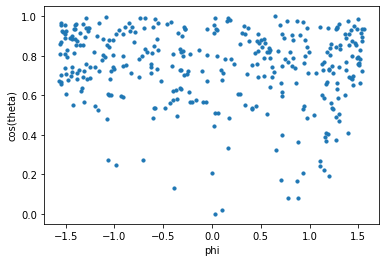

In [32]:
plt.scatter(data.get_clusterdf()['Azimuth'], np.cos(data.get_clusterdf()['Zenith'].values), s=10)
plt.xlabel("phi")
plt.ylabel("cos(theta)")

In [33]:
hist = np.load('data/exposure.npy')

bins = [36,38]
real_data, xedges, yedges = np.histogram2d(data.get_clusterdf()['Azimuth'].values, np.cos(data.get_clusterdf()['Zenith'].values), bins=bins, range=[[-np.pi/2, np.pi/2], [0, 1]])

adjusted_data = real_data / hist

In [34]:
#xpos = (xedges[:-1] + np.pi / bins[0] * 1/2) * 180 / np.pi
xpos = (xedges[:-1] + np.pi / bins[0] * 1/2) * 180 / np.pi
ypos = (yedges[:-1] + 1 / bins[1] * 1/2)

In [35]:
print(np.sum(phis))
print(np.sum(thetas))
print(np.sum(phi[:,1]))
print(np.sum(cos_theta[:,1]))


print(len(phis))
print(len(thetas))
print(len(phi[:,1]))
print(len(cos_theta[:,1]))

NameError: name 'phis' is not defined

/Users/julianyocum/opt/anaconda3/envs/UROP/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  """


NameError: name 'phi' is not defined

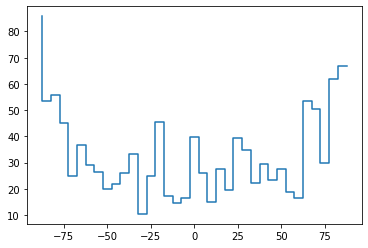

In [36]:
phis = np.sum(adjusted_data, axis=1)
thetas = np.sum(adjusted_data, axis=0)

plt.figure()
plt.plot(xpos, phis, ls='steps')
plt.scatter(phi[:,0], phi[:,1])

plt.figure()
plt.plot(ypos, thetas, ls='steps')
plt.scatter(cos_theta[:,0], cos_theta[:,1])

(array([ 2.,  0.,  0.,  2.,  0.,  1.,  2.,  3.,  1.,  2.,  3.,  0.,  2.,
         2.,  2.,  4.,  1.,  1.,  6.,  5., 12., 11., 11.,  9.,  7., 15.,
        15., 25., 25., 11., 21., 22., 19., 21., 20., 29., 20., 14.]),
 array([4.39999801e-05, 2.63549627e-02, 5.26659253e-02, 7.89768880e-02,
        1.05287851e-01, 1.31598813e-01, 1.57909776e-01, 1.84220739e-01,
        2.10531701e-01, 2.36842664e-01, 2.63153627e-01, 2.89464589e-01,
        3.15775552e-01, 3.42086515e-01, 3.68397478e-01, 3.94708440e-01,
        4.21019403e-01, 4.47330366e-01, 4.73641328e-01, 4.99952291e-01,
        5.26263254e-01, 5.52574216e-01, 5.78885179e-01, 6.05196142e-01,
        6.31507104e-01, 6.57818067e-01, 6.84129030e-01, 7.10439992e-01,
        7.36750955e-01, 7.63061918e-01, 7.89372880e-01, 8.15683843e-01,
        8.41994806e-01, 8.68305769e-01, 8.94616731e-01, 9.20927694e-01,
        9.47238657e-01, 9.73549619e-01, 9.99860582e-01]),
 <a list of 1 Patch objects>)

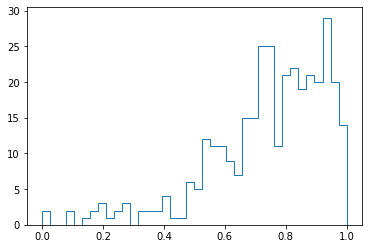

In [37]:
plt.hist(np.cos(data.get_clusterdf()['Zenith']), histtype='step', bins=38)

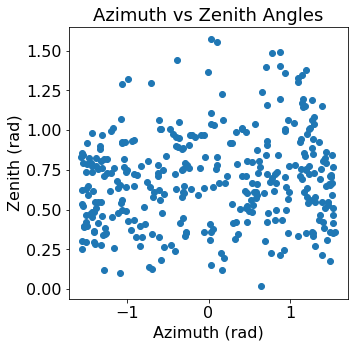

In [38]:
plt.figure(figsize=(5,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Azimuth vs Zenith Angles", fontsize=18)
plt.xlabel('Azimuth (rad)',fontsize=16)
plt.ylabel('Zenith (rad)',fontsize=16)

array = plt.scatter(data.get_clusterdf()['Azimuth'], data.get_clusterdf()['Zenith'])

plt.savefig('plots/pdf/Azimuth_vs_Zenith.pdf',bbox_inches = "tight")
plt.savefig('plots/png/Azimuth_vs_Zenith.png',dpi=300,bbox_inches = "tight")

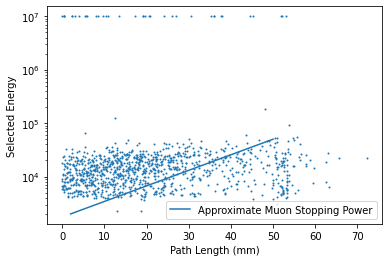

In [39]:
channeldata = data.get_eventdf()[data.get_eventdf()['Channel'] == 819]


quietdata = data.get_eventdf()[(data.get_eventdf()['Baseline'] + data.get_eventdf()['MaxToBaseline']) < 9000]
skim = quietdata[quietdata['PathLength'] < 50]
direct = quietdata[quietdata['PathLength'] > 50]

plt.xlabel("Path Length (mm)")
plt.ylabel("Selected Energy")
plt.scatter(quietdata['PathLength'], quietdata['StabAmp'], s=1)
plt.plot([10/5,10*5], [10000/5, 10000*5], label="Approximate Muon Stopping Power")
plt.legend()

#plt.gca().set_xscale("log")
plt.gca().set_yscale("log")





#plt.figure()

#plt.xlabel("Path Length (mm)")
#plt.ylabel("Selected Energy")
#plt.scatter(direct['PathLength'], direct['SelectedEnergy'], s=5)
#plt.gca().set_yscale("log")
#plt.gca().set_xscale("log")

In [40]:
data.get_eventdf()[(data.get_eventdf()['PathLength'] < 1) & (data.get_eventdf()['SelectedEnergy'] < .5e4)]

,Run,Channel,Time,NumPulses,OFdelay,MaxPosInWindow,SelectedEnergy,Baseline,MaxToBaseline,StabAmp,IsSaturated,MaxTime,Cluster,Hit,PathLength
97,350260,740,76693.232,1,3.133213,3.130,4903.131051,-4800.488973,3756.112600,6529.992841,False,76696.362,10,True,0.297412
2712,350263,324,318868.336,1,3.139079,3.178,4638.277121,-2743.117630,2091.674149,5990.202478,False,318871.514,78,True,0.893113
2793,350264,311,370419.400,2,3.148790,3.266,4183.417210,-2307.535253,2300.405584,5791.445352,False,370422.666,89,True,0.308324
3246,350265,955,457469.968,1,3.177726,3.170,3674.166506,-3511.127482,3536.361705,5829.656909,False,457473.138,117,True,0.974874
5066,350270,794,946996.296,1,3.180014,3.179,4035.924183,-3557.897898,3613.172862,5500.030968,False,946999.475,213,True,0.448797
5919,350274,595,1231761.160,1,3.166241,3.164,4191.547852,-3279.626892,3204.484985,5737.795078,False,1231764.324,272,True,0.036515
7271,350276,135,1481787.200,1,3.161279,3.161,4943.435798,-3792.263494,3519.012914,6569.691861,False,1481790.361,331,True,0.073926
8319,350285,515,2221387.648,1,3.176679,3.168,3627.611622,-3999.671071,2844.744771,5142.067422,False,2221390.816,433,True,0.348171
8947,350289,801,2584045.704,1,3.187486,3.182,4909.434391,-5792.431071,3357.288554,6664.412564,False,2584048.886,480,True,0.588803
9804,350292,223,2747003.216,1,3.144897,3.136,4889.899344,-3436.164413,1692.279373,6273.911083,False,2747006.352,504,True,0.273037


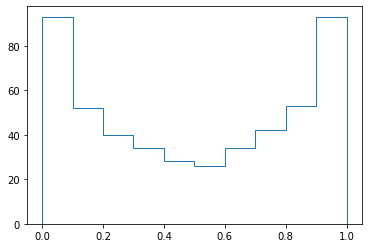

In [41]:
from sklearn.metrics import r2_score

chs = []
r2 = []
for ch in data.get_eventdf()['Channel'].unique():
    channeldata = data.get_eventdf()[data.get_eventdf()['Channel'] == ch]
    #channeldata = channeldata[channeldata['PathLength'] > 50]
    #channeldata = channeldata[(channeldata['Baseline'] + channeldata['MaxToBaseline']) > 9000]
    channeldata = channeldata[channeldata['Hit'] == True]
    n = len(channeldata)
    
    if n < 3:
        continue
    else:
        chs.append(ch)
        
    z = np.polyfit(channeldata['PathLength'], channeldata['SelectedEnergy'], 1)
    f = np.poly1d(z)

    y_true = channeldata['SelectedEnergy'].values
    y_pred = f(channeldata['PathLength'].values)

    r2.append(r2_score(y_true, y_pred))
    
array = plt.hist(r2, histtype='step')

In [42]:
r2

[0.9362279727655582,
 0.2901855349656609,
 0.6787567124437752,
 0.18127618064808582,
 0.03949111121140625,
 0.5244798097089263,
 0.31210945357752085,
 0.6449535544289151,
 0.09795014457899631,
 0.2949906336585002,
 0.7124855397655716,
 0.033810010779814714,
 0.8586099083449795,
 0.10594741728878765,
 0.9999994841040556,
 0.12273436910640778,
 0.4113517718412546,
 0.19187760754592498,
 0.4126496262749475,
 0.9895467990750082,
 0.0045213508957909765,
 0.8942902243382379,
 0.050048960462766745,
 0.15111942411735246,
 0.2844780519301344,
 0.4246267897247633,
 0.10534055303163625,
 0.1594871847181102,
 0.030799582009090054,
 0.13596620845837193,
 0.7993821587665167,
 0.5475292958892097,
 0.23148986550533013,
 0.8234534414660166,
 0.05825505438143741,
 0.2850996739199535,
 0.8269247309755315,
 0.7956833759220515,
 0.37205425030752015,
 0.2674594678098192,
 0.818656068356981,
 0.8559235789865607,
 0.63582748560903,
 0.6417064541906965,
 0.42084339770771984,
 0.012779208916735785,
 0.317471543

In [43]:
chs

[939,
 938,
 819,
 940,
 818,
 390,
 376,
 27,
 28,
 767,
 738,
 739,
 737,
 753,
 562,
 443,
 444,
 723,
 481,
 724,
 685,
 722,
 707,
 706,
 576,
 721,
 821,
 795,
 822,
 794,
 613,
 588,
 90,
 810,
 91,
 798,
 175,
 160,
 854,
 841,
 881,
 137,
 832,
 805,
 842,
 752,
 657,
 211,
 740,
 658,
 671,
 751,
 834,
 212,
 836,
 876,
 891,
 931,
 892,
 837,
 932,
 977,
 980,
 978,
 917,
 902,
 916,
 937,
 915,
 472,
 274,
 365,
 405,
 471,
 485,
 366,
 350,
 463,
 434,
 461,
 462,
 650,
 280,
 732,
 744,
 743,
 664,
 925,
 600,
 873,
 590,
 963,
 105,
 889,
 976,
 899,
 926,
 622,
 608,
 924,
 386,
 402,
 381,
 382,
 389,
 384,
 385,
 383,
 639,
 474,
 473,
 627,
 488,
 487,
 198,
 136,
 197,
 199,
 135,
 184,
 321,
 359,
 322,
 347,
 335,
 336,
 337,
 314,
 231,
 791,
 242,
 793,
 241,
 230,
 806,
 920,
 895,
 422,
 529,
 505,
 528,
 883,
 884,
 845,
 918,
 906,
 908,
 582,
 864,
 815,
 851,
 865,
 147,
 878,
 519,
 520,
 469,
 573,
 587,
 852,
 138,
 875,
 166,
 142,
 154,
 130,
 687,
 7

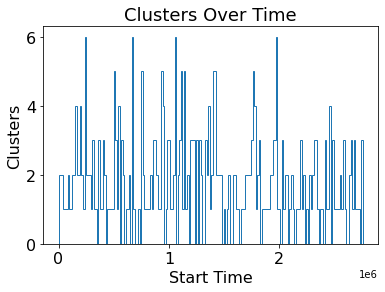

In [44]:
# plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Clusters Over Time", fontsize=18)
plt.ylabel('Clusters',fontsize=16)
plt.xlabel('Start Time',fontsize=16)
array=plt.hist(data.get_clusterdf()['StartTime'], np.linspace(0,2760000,200), histtype='step')
#plt.gca().set_yscale("log")

plt.savefig('plots/pdf/ClusterTimes.pdf',bbox_inches = "tight")
plt.savefig('plots/png/ClusterTimes.png',dpi=300,bbox_inches = "tight")